# Modelling Hydroponic Plant Health Detection

## A. Summary & How to Use

This model is to classify the health of selected hydroponic plant. By using this model we'll know if our hydroponic plants healthy or not, if it's not healthy we'll provide the type of sickness and provide the solution for that sickness.

## B. How to Make the Model?

##There will be 4 outline or main steps to make this model:
i. Data Processing and Data Preparation for Modelling

ii. Modelling Process (Transfer Learning)

iii. Evaluation

iv. Save the model and tflite model


### These 4 steps will be explained deeper below

## C. Data Processing and Preparation for Modelling
As the data from the dataset is the raw data, we need to process the data first before it is able to be used well. To get the best model, we need to supply it with the best processed data, not a raw data. After that the data is already "cleansed" and "chopped", what's left is to prepare it for the modelling process.

### i. Connect to Google Drive to access the dataset (optional)

You don't need this if you already had the dataset on your computer or you are running without using Google Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ii. Load Libraries

Load the libraries needed by using import. The libraries needed are:

* TensoFlow
* Matplotlib

In [2]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense
from keras.layers import Dropout
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

### iii. Defining the image size and the path

Defining the image size also the path to the training and validation test.

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/Shareddrives/Hydros_new/train'
valid_path = '/content/drive/Shareddrives/Hydros_new/test'

### iv. Preprocessing the Image data

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('/content/drive/Shareddrives/Hydros_new/train',
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6093 images belonging to 19 classes.


In [6]:
test_set = test_datagen.flow_from_directory('/content/drive/Shareddrives/Hydros_new/test',
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1354 images belonging to 19 classes.


## D. Modelling Process

The modelling process is the main topic of this document, as the modelling is the part where we make a new model based on the need. These are the steps in the model which will be used in the model.

1. Define the model.

 In this scoop, we used pre-trained MobileNetV2 that provided from Tensorflow. Later on, we'll add 4 layers of Keras Dropout layer, and 5 layers of Keras Dense layer.

 The activation function used in the pre-trained MobileNetV2 model is `Softmax`. The activation function used in the model is `ReLu` for first 4 layers of Keras Dense layer, as the `ReLU` activation function is one of the best activation function. And the activation function for the last Keras Dense layer is different (`softmax`) is used to do multinomial-class classification.

2. Compile the model.

 The loss function used in this model is the `categorical_crossentropy` (this loss is optimized for binary-class classification). To fit this model better, the "Adaptive Moment Estimation" (`Adam`) is used for optimization and `accuracy` as the metric.

3. Fit the model

 Fit the complied model with the epoch of 12 and test set as validation data.

### i. Initializing the base model

In [7]:
mobilenetv2 = tf.keras.applications.MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in mobilenetv2.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [8]:
x = Flatten()(mobilenetv2.output)
x = Dense(19, activation='softmax')(x)

model = Model(inputs=mobilenetv2.input, outputs=x)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

### ii. Compile and fit the model

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(training_set,
          validation_data=test_set,
          epochs=12
          )

Epoch 1/12
191/191 [==============================] - 1740s 9s/step - loss: 3.5752 - accuracy: 0.8398 - val_loss: 2.6075 - val_accuracy: 0.8715
Epoch 2/12
191/191 [==============================] - 251s 1s/step - loss: 1.3290 - accuracy: 0.9266 - val_loss: 2.3869 - val_accuracy: 0.8973
Epoch 3/12
191/191 [==============================] - 260s 1s/step - loss: 1.0956 - accuracy: 0.9427 - val_loss: 3.8369 - val_accuracy: 0.8781
Epoch 4/12
191/191 [==============================] - 255s 1s/step - loss: 0.9187 - accuracy: 0.9549 - val_loss: 4.2275 - val_accuracy: 0.8885
Epoch 5/12
191/191 [==============================] - 270s 1s/step - loss: 0.8094 - accuracy: 0.9654 - val_loss: 4.4824 - val_accuracy: 0.8981
Epoch 6/12
191/191 [==============================] - 251s 1s/step - loss: 0.5991 - accuracy: 0.9695 - val_loss: 4.1554 - val_accuracy: 0.8929
Epoch 7/12
191/191 [==============================] - 250s 1s/step - loss: 0.5765 - accuracy: 0.9736 - val_loss: 4.1951 - val_accuracy: 0.908

### iii. Adding Extra layers to Pre-trained Model


In [11]:
mobilenet = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in mobilenet.layers:
    layer.trainable = False

In [12]:
from tensorflow.keras.layers import Input

input_tensor = Input(shape=(224, 224, 3))
mobilenet_output = mobilenet(input_tensor)
flatten = Flatten()(mobilenet_output)

In [13]:
dense1 = Dense(256, activation='relu')(flatten)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense2)
dense3 = Dense(64, activation='relu')(dropout2)
dropout3 = Dropout(0.3)(dense3)
dense4 = Dense(32, activation='relu')(dropout3)
dropout4 = Dropout(0.3)(dense4)
output = Dense(19, activation='softmax')(dropout4)
model = Model(inputs=input_tensor, outputs=output)

### iv. Compile and fit the model, one more time..

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
fitting_history = model.fit(training_set,
                            validation_data=test_set,
                            epochs=12
                            )

Epoch 1/12
191/191 [==============================] - 255s 1s/step - loss: 2.4367 - accuracy: 0.4986 - val_loss: 0.8635 - val_accuracy: 0.7843
Epoch 2/12
191/191 [==============================] - 249s 1s/step - loss: 1.0172 - accuracy: 0.7151 - val_loss: 0.7636 - val_accuracy: 0.7851
Epoch 3/12
191/191 [==============================] - 250s 1s/step - loss: 0.8696 - accuracy: 0.7553 - val_loss: 0.6941 - val_accuracy: 0.7947
Epoch 4/12
191/191 [==============================] - 249s 1s/step - loss: 0.8698 - accuracy: 0.7550 - val_loss: 0.7009 - val_accuracy: 0.7984
Epoch 5/12
191/191 [==============================] - 247s 1s/step - loss: 0.8150 - accuracy: 0.7661 - val_loss: 0.7271 - val_accuracy: 0.7954
Epoch 6/12
191/191 [==============================] - 248s 1s/step - loss: 0.7697 - accuracy: 0.7778 - val_loss: 0.6769 - val_accuracy: 0.8035
Epoch 7/12
191/191 [==============================] - 252s 1s/step - loss: 0.7581 - accuracy: 0.7735 - val_loss: 0.7074 - val_accuracy: 0.8006

## E. Evaluating

The evaluation process is the last process in this document. This evaluation process aims to evaluate how the model works, and how the model converges through each epoch. There are to graphs going to be made, the accuracy plot, and the loss plot.

### i. Accuracy Plotting
Plot the accuracy of the model in the epoch. The plot is for accuracy of both the train set and the test set. After plotting, check the graph. Does the accuracy continue to increase or keep decreasing? If it continues to increase, then the model is well-fit.

In this case, the graph shows that the accuracy is increasing in both train and test set. This means that the model is well-fit.

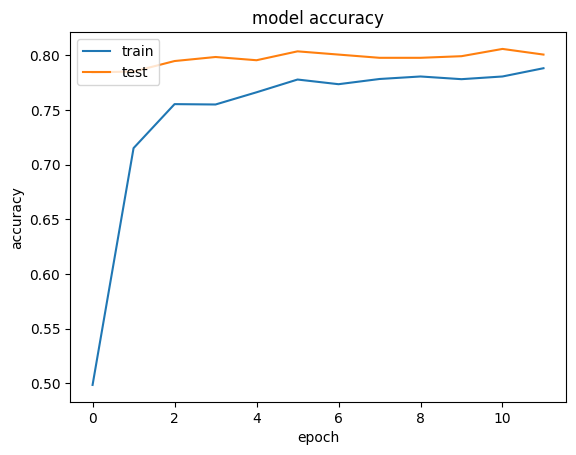

In [15]:
plt.plot(fitting_history.history['accuracy'])
plt.plot(fitting_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### ii. Loss Plotting

Plot the loss of the model in the epoch. As the opposite of accuracy, the plot is for loss of both the train set and the test set should decrease in each epoch. After plotting, check the graph. Does the loss continue to decrease or keep increasing? If it continues to decrease, then the model is well-fit.

In this case, the graph shows that the loss is decreasing in both train and test set. This means that the model is well-fit.

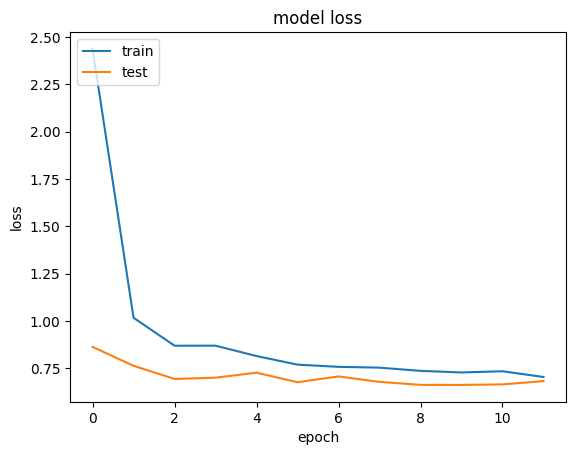

In [16]:
plt.plot(fitting_history.history['loss'])
plt.plot(fitting_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## F. Save the model and tflite model

1. Save the best model into .h5 for retraining or just to load and make some predictions with the model.

2. Convert the .h5 model and save it to .tflite model

In [17]:
# Save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [18]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

open("model_mobilenetv2.tflite", "wb").write(tflite_model)

73268484

## G. Conclusion

Based on the evaluation matrix (from the graph of the accuracy and the loss function), the model made was well-fit with the accuracy and the val_accuracy. So, we can use the best model generated from this model to predict our data, eventhough the number of accuracy wasn't really that high. It's the best accuracy that we can get from other base model (VGG19, RestNet, etc.).

The obstacle that we're having while building this model was when collecting the dataset, our dataset wasn't very big because there are few data in the internet and there wasn't so much different in our hydroponic plants pick (ex: lettuce and green mustard).